# Testing variance of `TFNoiseAwareModel` on GPU

We'll start by testing the `textRNN` model on a categorical problem from `tutorials/crowdsourcing`.  In particular we'll test for (a) basic performance and (b) proper construction / re-construction of the TF computation graph both after (i) repeated notebook calls, and (ii) with `GridSearch` in particular.

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

import os
os.environ['SNORKELDB'] = 'sqlite:///{0}{1}crowdsourcing.db'.format(os.getcwd(), os.sep)

from snorkel import SnorkelSession
session = SnorkelSession()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load candidates and training marginals

In [2]:
from snorkel.models import candidate_subclass
from snorkel.contrib.models.text import RawText
Tweet = candidate_subclass('Tweet', ['tweet'], cardinality=5)
train_tweets = session.query(Tweet).filter(Tweet.split == 0).order_by(Tweet.id).all()
len(train_tweets)

568

In [3]:
from snorkel.annotations import load_marginals
train_marginals = load_marginals(session, train_tweets, split=0)
train_marginals.shape

(568, 5)

In [6]:
import numpy as np
test_labels = np.load('crowdsourcing_test_labels.npy')

### Train basic LSTM

With dev set scoring during execution (note we use test set here to be simple)

In [10]:
from snorkel.learning import TextRNN
test_tweets = session.query(Tweet).filter(Tweet.split == 1).order_by(Tweet.id).all()

train_kwargs = {
    'dim':        100,
    'lr':         0.001,
    'dropout':    0.2,
    'print_freq': 5
}

### First try no seed, no deterministic ops

In [11]:
%%time
accs = []
N_EPOCHS = [5, 10, 50, 100]
for n_epochs in N_EPOCHS:
    epoch_accs = []
    for _ in range(10):
        lstm = TextRNN(seed=None, deterministic=False, cardinality=Tweet.cardinality)
        lstm.train(train_tweets, train_marginals, X_dev=test_tweets, Y_dev=test_labels,
                   n_epochs=n_epochs, **train_kwargs)
        acc = lstm.score(test_tweets, test_labels)
        print acc
        epoch_accs.append(acc)
    accs.append(epoch_accs)

[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.39s)	Average loss=1.600530	Dev Acc.=35.94
[TextRNN] Epoch 4 (1.60s)	Average loss=1.419734	Dev Acc.=32.81
[TextRNN] Model saved as <TextRNN>
[TextRNN] Training done (3.71s)
INFO:tensorflow:Restoring parameters from checkpoints/TextRNN/TextRNN-4
[TextRNN] Loaded model <TextRNN>
0.328125
[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.37s)	Average loss=1.599133	Dev Acc.=35.94
[TextRNN] Epoch 4 (1.50s)	Average loss=1.420553	Dev Acc.=32.81
[TextRNN] Model saved as <TextRNN>
[TextRNN] Training done (3.43s)
INFO:tensorflow:Restoring parameters from checkpoints/TextRNN/TextRNN-4
[TextRNN] Loaded model <TextRNN>
0.328125
[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.36s)	Average loss=1.598840	Dev Acc.=43.75
[TextRNN] Epoch 4 (1.47s)	Average loss=1.426525	Dev Acc.=26.56
[TextRNN] Model saved as <TextRNN>
[Te

In [34]:
%%time
accs_2 = []
N_EPOCHS = [5, 10, 50, 100]
for n_epochs in N_EPOCHS:
    epoch_accs = []
    for _ in range(10):
        lstm = TextRNN(seed=123, deterministic=False, cardinality=Tweet.cardinality)
        lstm.train(train_tweets, train_marginals, X_dev=test_tweets, Y_dev=test_labels,
                   n_epochs=n_epochs, **train_kwargs)
        acc = lstm.score(test_tweets, test_labels)
        print acc
        epoch_accs.append(acc)
    accs_2.append(epoch_accs)

[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.37s)	Average loss=1.600325	Dev Acc.=40.62
[TextRNN] Epoch 4 (1.51s)	Average loss=1.433875	Dev Acc.=31.25
[TextRNN] Model saved as <TextRNN>
[TextRNN] Training done (3.49s)
INFO:tensorflow:Restoring parameters from checkpoints/TextRNN/TextRNN-4
[TextRNN] Loaded model <TextRNN>
0.3125
[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.35s)	Average loss=1.600325	Dev Acc.=40.62
[TextRNN] Epoch 4 (1.47s)	Average loss=1.433879	Dev Acc.=31.25
[TextRNN] Model saved as <TextRNN>
[TextRNN] Training done (3.19s)
INFO:tensorflow:Restoring parameters from checkpoints/TextRNN/TextRNN-4
[TextRNN] Loaded model <TextRNN>
0.3125
[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.36s)	Average loss=1.600325	Dev Acc.=40.62
[TextRNN] Epoch 4 (1.55s)	Average loss=1.433879	Dev Acc.=31.25
[TextRNN] Model saved as <TextRNN>
[TextRN

In [36]:
%%time
accs_3 = []
N_EPOCHS = [5, 10, 50, 100]
for n_epochs in N_EPOCHS:
    epoch_accs = []
    for _ in range(10):
        lstm = TextRNN(seed=123, deterministic=True, cardinality=Tweet.cardinality)
        lstm.train(train_tweets, train_marginals, X_dev=test_tweets, Y_dev=test_labels,
                   n_epochs=n_epochs, **train_kwargs)
        acc = lstm.score(test_tweets, test_labels)
        print acc
        epoch_accs.append(acc)
    accs_3.append(epoch_accs)

[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.38s)	Average loss=1.600325	Dev Acc.=40.62
[TextRNN] Epoch 4 (1.56s)	Average loss=1.433879	Dev Acc.=31.25
[TextRNN] Model saved as <TextRNN>
[TextRNN] Training done (3.67s)
INFO:tensorflow:Restoring parameters from checkpoints/TextRNN/TextRNN-4
[TextRNN] Loaded model <TextRNN>
0.3125
[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.36s)	Average loss=1.600325	Dev Acc.=40.62
[TextRNN] Epoch 4 (1.46s)	Average loss=1.433879	Dev Acc.=31.25
[TextRNN] Model saved as <TextRNN>
[TextRNN] Training done (3.12s)
INFO:tensorflow:Restoring parameters from checkpoints/TextRNN/TextRNN-4
[TextRNN] Loaded model <TextRNN>
0.3125
[TextRNN] Training model
[TextRNN] n_train=568  #epochs=5  batch size=256
[TextRNN] Epoch 0 (0.37s)	Average loss=1.600325	Dev Acc.=40.62
[TextRNN] Epoch 4 (1.57s)	Average loss=1.433875	Dev Acc.=31.25
[TextRNN] Model saved as <TextRNN>
[TextRN

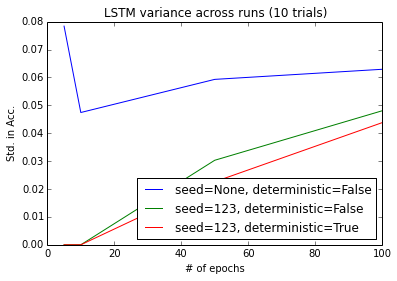

In [41]:
plt.plot(N_EPOCHS, np.std(accs, axis=1), label="seed=None, deterministic=False")
plt.plot(N_EPOCHS, np.std(accs_2, axis=1), label="seed=123, deterministic=False")
plt.plot(N_EPOCHS, np.std(accs_3, axis=1), label="seed=123, deterministic=True")
plt.legend(loc=4)
plt.xlabel("# of epochs")
plt.ylabel("Std. in Acc.")
plt.title("LSTM variance across runs (10 trials)")
plt.show()

### Notes:

* Make sure there isn't some issue with checkpoint saving...
    - Test with dev set checkpointing off + make each one have its own save directory
* Plot variance by # of epochs, for: (1) `seed=None, deterministic=False`, (2) `seed=123, deterministic=False`, (3) `seed=123, deterministic=True`